# 微分方程式モデル

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import curve_fit

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

本章の内容は，文献{cite}`Kawamura2021,Endo2017,Odaka2018,Hashimoto2021` を主に参考にしている．

## 微分方程式とは？

### 微分方程式の定義

独立変数を $ t $，$ t $に伴って決まる従属変数を $ x(t) $ とする．
このとき，$ x $ の $ t $ による微分を含む方程式を**微分方程式**と呼ぶ．
例えば，以下は微分方程式の例である：

\begin{align*}
    \frac{dx}{dt} &= 2t \\[10pt]
    m\frac{d^2x}{dt^2} &= -mg-k\left(\frac{dx}{dt}\right)^2 \\
\end{align*}

微分方程式は高階の微分を含んでもよく，最も高次の微分の次数は**微分方程式の階数**と呼ばれる．
また，$ x $ と $ x $ の微分が全て1次式である場合を**線形微分方程式**，それ以外を**非線形微分方程式**と呼ぶ．
例えば，上の式は，線形の1階微分方程式と非線形の2階微分方程式である．
なお，微分方程式には，独立変数が1つである**常微分方程式**と独立変数が複数ある**偏微分方程式**があるが，本章では常微分方程式のみを扱う．

微分方程式は2次方程式や連立方程式のように解を求めることができる．
微分方程式において解を求めるとは，与えられた微分方程式を満たすような関数 $ x(t) $ を求めることを指し，これを**微分方程式を解く**という．

微分方程式が与えられたときにその解を求める方法は主に２種類存在する．
１つ目は式変形を行って解く方法で，これを**解析的に解く**という．
一般に，微分方程式が与えられたときにそれを解析的に解くのは困難であることが多く，非線形の微分方程式や偏微分方程式の場合は特に難しい．
そこで，このような場合には２つ目の方法として，微分方程式を離散化してコンピュータ等で解を求める方法がある．
これを**数値的に解く**という．
数値解には必ず誤差が含まれるため，誤差を小さくするための様々なアルゴリズムが提案されている．

以下では解析的に解ける微分方程式の例をいくつか紹介する．
また，Pythonを使って微分方程式を数値的に解く方法についても紹介する．

### 簡単な微分方程式

$ t $ が時刻，$ x(t) $ が時刻$ t $の物体の位置を表すとすると，物体の速度 $ v $ は $ v = \frac{dx}{dt} $ で与えられる．
いま，速度が一定値 $ v_{0} $ であると仮定すると，

$$
    \frac{dx}{dt} = v_{0} 
$$

が成り立つ．
これを**等速直線運動**と呼ぶ．
これは，物体の運動を表す最も簡単な微分方程式である．
この微分方程式の解を求めるには，両辺を $ t $ で積分すれば良い：

$$
    \int \frac{dx}{dt} dt = \int v_{0} dt \\[10pt]
    x(t) = v_{0} t + C
$$

ここで，$ C $ は積分定数であるが，$ t=0 $ の位置を $ x(0)=x_{0} $ とすると，$ C=x_{0} $ となる．
よって，微分方程式の解は，

$$
    x(t) = v_{0} t + x_{0}
$$

と表される．
このように，$ v_{0},\ x_{0} $ のような未知定数を含む解を**一般解**と呼ぶ．
一方，初期位置が $ x_{0}=0 $，初速が $ 2 $ m/s であるとすると，$ x(t)=2t $ となる．
このように，未知定数に具体的な値を代入して得られる解を**特殊解**と呼ぶ．
<!-- 以上のように，時間 $ t $ を独立変数とする微分方程式に対し，$ t=0 $ のときの条件（**初期条件**）を用いて解を求めることを**初期値問題**と呼ぶ． -->

## 人口の増加

個体数の増減という問題は，実社会から自然界まで幅広く存在する．
例えば，実社会において，今後数十年で人口がどのように増減するかを予測することは，国家レベルで議論するべき大問題である．
また，自然界においても，様々な生物種の個体数がどのように増減するか分かれば，食物連鎖のダイナミクスを理解したり，獣害に関する対策を立てたりするのに役立つ．
個体数の増減は，微分方程式で記述される現象の典型例であり，微分方程式の基礎を理解するのにも適した問題である．
以下では，個体数の増減に関する微分方程式のうち，いくつかの基本的な例を紹介する．

### マルサスモデル

時刻 $ t $ におけるある国の総人口を $ N(t) $ とすると，人口の増加率は $ dN(t)/dt $ と表される．
経済学者のマルサス（Thomas Robert Malthus）は，人口の増加率がそのときの人口に比例すると考え，以下のようなモデルを提案した：

$$
	\frac{dN}{dt} = \alpha N(t)
$$

この式は1階微分方程式であり，**マルサスモデル**と呼ばれる．

マルサスモデルは，以下のように独立変数 $ t $ と従属変数 $ N(t) $ を左辺と右辺に分離することができる：

$$
	\frac{1}{N} dN = \alpha dt
$$

このような変数の分離が可能な微分方程式は，**変数分離形**と呼ばれ，変数分離することで積分が可能となる．
実際に両辺を不定積分すると，

$$
	\ln N = \alpha t + C
$$

より

$$
	N(t) = \mathrm{e}^{\alpha t + C}
$$

となる．
また，$ N(t) $ の初期条件を $ t=0 $ で $ N(0)=N_{0} $ とすると

$$
	N(0) = \mathrm{e}^{C} = N_{0}
$$

となるので，一般解は

$$
	N(t) = N_{0} \mathrm{e}^{\alpha t}
$$

となる．

マルサスモデルの解は $ N(t) $ が $ t $ の関数として表されているので，初期時刻での人口 $ N_{0} $ を与えれば，その後の任意の時刻において人口を予測できる．
特に，人口が指数関数的に際限なく増加するというのがマルサスモデルの特徴である．
なお，$ \alpha < 0 $ の場合には指数関数的な減少を表すことになる．
この場合のモデルは，放射性元素の崩壊や，ある種の病気の感染者数の減少などに適用できる．

### ロジスティックモデル

マルサスモデルでは，指数関数的な増加がいつまでも続くが，人口が増えすぎると食料資源の不足や環境的要因などによって人口の増加を抑制する効果がはたらくのが自然である．
このような考察から，より現実に即したモデルとしてVerhulstによって導入されたのが以下の微分方程式である：

$$
	\frac{dN}{dt} = \gamma \left(1 - \frac{N(t)}{N_{\infty}}\right)N(t)
$$

これは**ロジスティックモデル**と呼ばれる．
ここで，$ \gamma,\ N_{\infty} $ は定数である．
ロジスティックモデルは，マルサスモデルの $ \alpha $ を以下のように置き換えた形になっている：

$$
	\alpha \rightarrow \gamma \left(1 - \frac{N(t)}{N_{\infty}}\right)
$$

ロジスティックモデルは右辺が非線形な関数となっているが，これも変数分離形なのでマルサスモデルと同じように解くことができる．
まず，式を以下のように変形する：

$$
	\int \frac{dN}{N(1 - N/N_{\infty})} = \int \gamma dt
$$

ここで，左辺の被積分変数を部分分数分解すると，

$$
	\int \left[\frac{1}{N} - \frac{1/N_{\infty}}{(1-N/N_{\infty})}\right]dN = \int \gamma dt
$$

となる．
これより，両辺を不定積分することができて，

\begin{align*}
	\ln \left(\frac{N}{1-N/N_{\infty}}\right) &= \gamma t + C
\end{align*}

となる．
さらに，初期条件として　$ t=0 $　で　$ N(0)=N_{0} $　とすれば，最終的に

$$
	N(t) = \frac{N_{\infty}}{1+[(N_{\infty}/N_{0})-1]\mathrm{e}^{-\gamma t}}
$$

という一般解を得る．

得られた一般解は**シグモイド関数**と呼ばれ，下図のような時間変化となる．
初期の個体数が $ N_{0} < N_{\infty} $ を満たす場合には，最初は指数関数的な増加を示すが，次第に増加率が小さくなっていき，最終的には $ N_{\infty} $ に収束する．
この意味で，$ N_{\infty} $ は人口の上限を表す定数であることが分かる．
一方，$ N_{0} > N_{\infty} $ の場合には指数関数的な減少を示すが，この場合にも最終的には $ N_{\infty} $ へと収束する．

なお，実社会における人口の増加はマルサスモデルよりもロジスティックモデルに近いふるまいをするが，完璧に記述できるわけではない．
それでも，微生物などの場合には，環境をコントロールした実験によって，その増殖の仕方がロジスティックモデルによく従うことが分かっている．
また，感染症のモデルとして知られるSIモデル（未感染者が感染者と接触すると一定の確率で感染するモデル）は感染者数がロジスティックモデルに従う．
さらに，家電の普及率など，近似的にロジスティックモデルで記述できる現象は多い．

生物集団における個体数変化のモデルをより現実に近づけるためには，多数の生物種の間の捕食・被食関係を考慮する方法が考えられる．
このようなモデルの中で単純なものとして，2種の生物間の相互作用を考慮した**ロトカ・ヴォルテラモデル**が知られている．

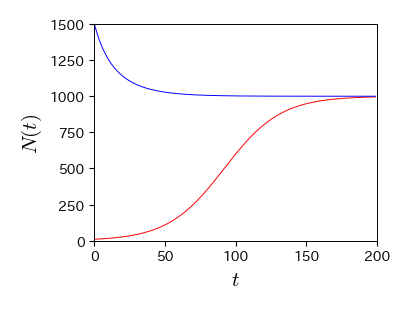

In [9]:
def f_logistic(t, N0, N_max, gamma):
    return N_max*(1+(N_max/N0 - 1)*np.exp(-np.clip(gamma*t, -709, 100000)))**(-1)

fig, ax = plt.subplots(figsize=(4, 3))
t = np.arange(200)
ax.plot(t, f_logistic(t, 10, 1000, 0.05), 'r-')
ax.plot(t, f_logistic(t, 1500, 1000, 0.05), 'b-')

ax.set_xlim(0, 200), ax.set_ylim(0, 1500); 
ax.set_xlabel('$t$', fontsize=15)
ax.set_ylabel('$N(t)$', fontsize=15);

改めて，韓国における新型コロナウイルス感染者数の推移データ（[covid19_korea.csv](https://drive.google.com/uc?export=download&id=14l9chvX4PqHMQQl2yTQTPm7J7S5Us6Xz)）を調べてみよう．
このデータを読み込み，横軸に2020年1月22日を0日とした経過日数，縦軸に感染者数を取った散布図を50日目までと100日目までに分けて描くと，いずれもシグモイド関数のような変化となる．
そこで，$ N_{0},\ N_{\infty}, \gamma $ をフィッティングパラメータとして最小二乗法でフィッティングを行うと，以下のような結果が得られる．
50日目まではほぼシグモイド関数に従っているが，50日目以降で増加の仕方に変化があり，シグモイド関数からのズレが見られることが分かる．

※ 本データの出典：[John Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

In [65]:
# シグモイド関数の定義
def f_logistic(t, N0, N_inf, gamma): 
    return N_inf * (1+(N_inf/N0-1)*np.exp(-np.clip(gamma*t, -709, 100000)))**(-1)

[6.44366481e-03 7.94804311e+03 3.55899263e-01]
[4.72320355e+00 1.01973809e+04 1.79595109e-01]


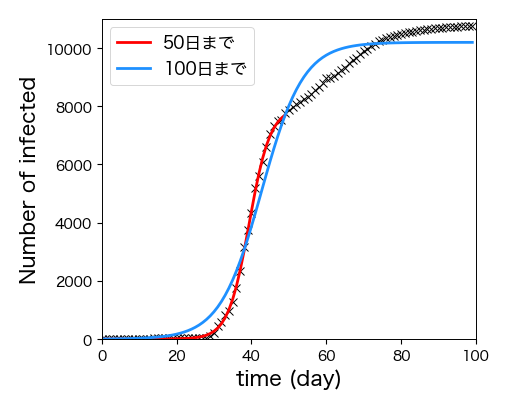

In [70]:
# データの読み込み
data = pd.read_csv('./covid19_korea.csv', header=0)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(data.index[:100], data['num'][:100], 'x', ms=6)

for tmax in [50, 100]:
    t, Nt = data.index[:tmax], data['num'][:tmax] 
    p_opt = curve_fit(f_logistic, t, Nt)[0]
    print(p_opt)
    ax.plot(t, f_logistic(t, p_opt[0], p_opt[1], p_opt[2]), '-', lw=2, label='%s日まで' % tmax)

ax.set_xlim(0, 100), ax.set_ylim(0, 11000)
ax.set_xlabel('time (day)', fontsize=15); ax.set_ylabel('Number of infected', fontsize=15)
ax.legend(loc='upper left', fontsize=12);

## 微分方程式の数値計算

### オイラー法による数値計算

マルサスモデルは解析的に解くことができた．
ここでは，この微分方程式をコンピュータで数値的に解く方法を考えてみよう．
まず，微分方程式をコンピュータで扱う際には微分の計算

$$
    \frac{dN}{dt} = \lim_{\Delta t \to 0} \frac{N(t+\Delta t) - N(t)}{\Delta t}
$$

を行う必要があるが，コンピュータ上で $ \Delta t $ を厳密に0にすることはできない．
しかし，$ \Delta t $ を十分に小さくとれば，微分の近似値として十分に精度の高い値を得ることができるだろう．
そこで，マルサスモデルを以下のように変形する：

\begin{align*}
    \frac{N(t+\Delta t) - N(t)}{\Delta t} &= \alpha N(t) \\[10pt]
    N(t+\Delta t) &=  (1 + \alpha \Delta t)N(t)
\end{align*}

この式は，$ N(t) $ から次の時刻の $ N(t+\Delta t) $ を求める漸化式と見なすことができる．
よって，初期条件 $ N(0) $ から $ N(1) $ を求め，さらに $ N(1) $ から $ N(2) $ を求めていけば，任意の時刻における $ N(t) $ を求めることができる．

以上の方法は**オイラー法**と呼ばれる．
オイラー法は $ \Delta t $ を小さくとると精度が向上するが，その分計算量が増えてしまうという欠点がある．
しかし，この方法は直感的にも分かりやすく，また，微分方程式の数値計算の基礎となるため，しっかりと理解しておく必要がある．

オイラー法は，以下のような任意の１階微分方程式に対して適用できる：

\begin{align*}
    \frac{du}{dt} &= f(t, u(t)) \\[10pt]
    u(0) &= u_{0}
\end{align*}

例えば，マルサスモデルの場合は $ f(t, u(t)) = \alpha u(t) $ である．
<!-- オイラー法をPythonで実装する準備として，この形の微分方程式に対して式を整理しておこう． -->
$ \Delta t $ の間隔に離散化した時刻を $ t_{n} = n\Delta t $ とし，$ u(t_{n}) = u_{n} $ と表記する．
このとき，上の微分方程式は以下のように離散化することができる：

\begin{align*}
    \frac{u(t_{n}+\Delta t) - u(t_{n})}{\Delta t} &= f(t_{n}, u(t_{n})) \\[10pt]
    u_{n+1} &= u_{n} + \Delta t f(t_{n}, u_{n})
\end{align*}

In [32]:
def f(n, u_n):
    return 2*u_n

Dt = 0.01
U = [1]
for n in range(1000):
    U.append(U[n]+Dt*f(n, U[n]))

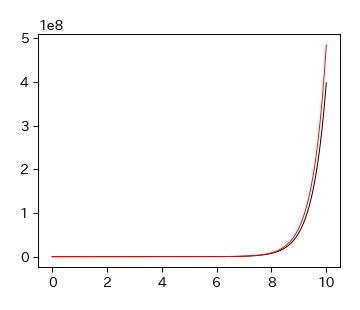

In [33]:
fig, ax = plt.subplots()
t = np.arange(len(U))*Dt
ax.plot(t, U)
ax.plot(t, np.exp(2*t), 'r-')

### Scipy.integrate.solve_ivpによる数値計算